# Setting the environment



In [1]:
!git pull https://github.com/abasilio91/brecom-analysis/

# Go to https://www.kaggle.com/docs/api and follow procedure to download your kaggle.json file.
# After that, if you are using Google Colab, upload it in the content folder
# If not, move your kaggle.json to the your .kaggle folder

Already up to date.


From https://github.com/abasilio91/brecom-analysis
 * branch            HEAD       -> FETCH_HEAD


In [2]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

C:\Users\adam_\AppData\Local\Temp\ipykernel_8408\3950137445.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adam_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('')

In [6]:
!kaggle datasets download -d olistbr/brazilian-ecommerce -p D:\Adam\Estudos\ADA\tecprog\projeto\brecom-analysis\database --unzip


  0%|          | 0.00/42.6M [00:00<?, ?B/s]
  2%|▏         | 1.00M/42.6M [00:00<00:17, 2.56MB/s]
  7%|▋         | 3.00M/42.6M [00:00<00:06, 6.53MB/s]
 14%|█▍        | 6.00M/42.6M [00:00<00:03, 11.6MB/s]
 21%|██        | 9.00M/42.6M [00:00<00:02, 16.1MB/s]
 28%|██▊       | 12.0M/42.6M [00:00<00:01, 18.6MB/s]
 35%|███▌      | 15.0M/42.6M [00:01<00:01, 21.2MB/s]
 42%|████▏     | 18.0M/42.6M [00:01<00:01, 23.4MB/s]
 49%|████▉     | 21.0M/42.6M [00:01<00:00, 24.8MB/s]
 56%|█████▋    | 24.0M/42.6M [00:01<00:00, 26.0MB/s]
 63%|██████▎   | 27.0M/42.6M [00:01<00:00, 27.2MB/s]
 70%|███████   | 30.0M/42.6M [00:01<00:00, 25.2MB/s]
 77%|███████▋  | 33.0M/42.6M [00:01<00:00, 22.7MB/s]
 84%|████████▍ | 36.0M/42.6M [00:01<00:00, 21.4MB/s]
 91%|█████████▏| 39.0M/42.6M [00:02<00:00, 21.4MB/s]
 98%|█████████▊| 42.0M/42.6M [00:02<00:00, 22.5MB/s]
100%|██████████| 42.6M/42.6M [00:02<00:00, 19.8MB/s]


## loading files into memory

In [7]:
# Quasi-database using pandas
customers = pd.read_csv('database/olist_customers_dataset.csv', dtype=str)
geolocation = pd.read_csv('database/olist_geolocation_dataset.csv', dtype=str)
order_items = pd.read_csv('database/olist_order_items_dataset.csv', dtype=str)
order_payments = pd.read_csv('database/olist_order_payments_dataset.csv', dtype=str)
order_reviews = pd.read_csv('database/olist_order_reviews_dataset.csv', dtype=str)
orders = pd.read_csv('database/olist_orders_dataset.csv', dtype=str)
products = pd.read_csv('database/olist_products_dataset.csv', dtype=str)
sellers = pd.read_csv('database/olist_sellers_dataset.csv', dtype=str)

# Exploratory analysis

## Checking for inconsistancies

### Customers

In [8]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [9]:
n_unique_customers = len(customers.customer_unique_id.unique())
n_unique_customers

96096

In [10]:
n_base_customers = len(customers.customer_id.unique())
n_base_customers

99441

Since `n_unique_customers` $\neq$ `n_base_customers`, it seems the same customer can show up in the base in different cities.

In [11]:
# Checking for customers with multiple city entries

customers.value_counts(subset='customer_unique_id')

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: count, Length: 96096, dtype: int64

In [12]:
# NaN values

customers.isna().value_counts()

customer_id  customer_unique_id  customer_zip_code_prefix  customer_city  customer_state
False        False               False                     False          False             99441
Name: count, dtype: int64

No inconsistancies were found in this base.

### Geolocation

In [13]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.54562128115268,-46.63929204800168,sao paulo,SP
1,01046,-23.546081127035535,-46.64482029837157,sao paulo,SP
2,01046,-23.54612896641469,-46.64295148361138,sao paulo,SP
3,01041,-23.5443921648681,-46.63949930627844,sao paulo,SP
4,01035,-23.541577961711493,-46.64160722329613,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.06863887662893,-52.01070524698279,tapejara,RS
1000159,99900,-27.877125117712357,-52.22488216264145,getulio vargas,RS
1000160,99950,-28.07185541645192,-52.01471586864233,tapejara,RS
1000161,99980,-28.388931876600495,-51.84687132274168,david canabarro,RS


In [14]:
geolocation.isna().value_counts()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  geolocation_city  geolocation_state
False                        False            False            False             False                1000163
Name: count, dtype: int64

In [15]:
len(geolocation.geolocation_city.unique())

8011

In [16]:
geolocation.geolocation_city.value_counts()

geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: count, Length: 8011, dtype: int64

In [17]:
geolocation.geolocation_zip_code_prefix.value_counts()

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
71750       1
71742       1
26475       1
26357       1
29826       1
Name: count, Length: 19015, dtype: int64

In [18]:
geolocation[['geolocation_lat','geolocation_lng']].value_counts()

geolocation_lat      geolocation_lng    
-27.102098999999946  -48.62961349999995     314
-23.495901469908656  -46.87468669635919     190
-23.506049208479613  -46.71737739541604     141
-23.490617505282753  -46.86900366603934     127
-23.00551425914832   -43.37596441256672     102
                                           ... 
-22.46771886866123   -44.0769504183993        1
-22.46774061547971   -44.441692315810535      1
-22.467757728039338  -48.561537808648865      1
-22.4677705400581    -48.989023806571645      1
45.06593318269697    9.341527629906514        1
Name: count, Length: 718463, dtype: int64

### Order items

In [19]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [20]:
order_items.order_id.value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [21]:
order_items.isna().value_counts()

order_id  order_item_id  product_id  seller_id  shipping_limit_date  price  freight_value
False     False          False       False      False                False  False            112650
Name: count, dtype: int64

### Order payments

In [22]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [23]:
order_payments.isna().value_counts()

order_id  payment_sequential  payment_type  payment_installments  payment_value
False     False               False         False                 False            103886
Name: count, dtype: int64

In [24]:
order_payments.order_id.value_counts()

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99440, dtype: int64

In [25]:
order_payments.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [26]:
order_payments.payment_installments.value_counts()

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

### Order reviews

In [27]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [28]:
order_reviews.isna().value_counts()

review_id  order_id  review_score  review_comment_title  review_comment_message  review_creation_date  review_answer_timestamp
False      False     False         True                  True                    False                 False                      56518
                                                         False                   False                 False                      31138
                                   False                 False                   False                 False                       9839
                                                         True                    False                 False                       1729
Name: count, dtype: int64

In [29]:
order_reviews.review_id.value_counts()

review_id
7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
95e01591b0e69a2fab382b0c562d4e20    1
93611e0327d6a1769d1e68cf3caa242d    1
983c47de74278257f99c4b918fd380f1    1
ca475b77fcc618551ef9d516c3f61b88    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: count, Length: 98410, dtype: int64

In [30]:
order_reviews.order_id.value_counts()

order_id
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: count, Length: 98673, dtype: int64

In [31]:
order_reviews.review_score.value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

### Orders

In [32]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [33]:
orders.isna().value_counts()

order_id  customer_id  order_status  order_purchase_timestamp  order_approved_at  order_delivered_carrier_date  order_delivered_customer_date  order_estimated_delivery_date
False     False        False         False                     False              False                         False                          False                            96461
                                                                                  True                          True                           False                             1636
                                                                                  False                         True                           False                             1183
                                                               True               True                          True                           False                              146
                                                                                  False            

In [34]:
orders.order_id.value_counts()

order_id
e481f51cbdc54678b7cc49136f2d6af7    1
f01059d0d674e1282df4e8fbbe015aa2    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
9373150545066777b1cd2bc20e93cf8e    1
917399e96f92268dfa2c0351b1b75fba    1
                                   ..
6b8986012d61963295ffa3ea869aff86    1
be879f757debd3b384b540daa6ddd97e    1
ac3ce7eda1246f39509a505242fcc169    1
e801a93b3904ca9e8350f176a037047b    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: count, Length: 99441, dtype: int64

In [35]:
orders.customer_id.value_counts()

customer_id
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: count, Length: 99441, dtype: int64

In [36]:
orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### Products

In [37]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45,67,2,12300,40,40,40
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41,971,1,1700,16,19,16
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50,799,1,1400,27,7,27
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20


In [38]:
products.isna().value_counts()

product_id  product_category_name  product_name_lenght  product_description_lenght  product_photos_qty  product_weight_g  product_length_cm  product_height_cm  product_width_cm
False       False                  False                False                       False               False             False              False              False               32340
            True                   True                 True                        True                False             False              False              False                 609
            False                  False                False                       False               True              True               True               True                    1
            True                   True                 True                        True                True              True               True               True                    1
Name: count, dtype: int64

In [39]:
products.product_id.value_counts()

product_id
1e9e8ef04dbcff4541ed26657ea517e5    1
d05cc9afc85771f597cf4bc9d8f12546    1
71b7afd92c42feab780d5ea512fc7348    1
5c5f3e091101bea69642eb3dd145b17d    1
16d47089f9bc7f16de16cc4bd3b9dd49    1
                                   ..
c154987c6780d1a2b579aae00e53485f    1
1a6c9da4039deae58c2b769f049ae121    1
4cb35e544a1de008f37e069f172f964e    1
b34b2c889f5b26963569cf421254e121    1
106392145fca363410d287a815be6de4    1
Name: count, Length: 32951, dtype: int64

In [40]:
products.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

### Sellers

In [41]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,04650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [42]:
sellers.isna().value_counts()

seller_id  seller_zip_code_prefix  seller_city  seller_state
False      False                   False        False           3095
Name: count, dtype: int64

In [43]:
sellers.seller_id.value_counts()

seller_id
3442f8959a84dea7ee197c632cb2df15    1
e26901d5ab434ce92fd9b5c256820a4e    1
7e3f87d16fb353f408d467e74fbd8014    1
9140bd1d9de28b197dce077bdd687438    1
a2b911e9ad40dc7d61c142a4683e2d85    1
                                   ..
f918546be4bec7104d117789ba758b2b    1
eb4a59a06b3948e851a7d7a830bcbc42    1
80146bc52c4f6af5239b23de2a20262b    1
4091f77d8c768fc3e81c20761471761d    1
9e25199f6ef7e7c347120ff175652c3b    1
Name: count, Length: 3095, dtype: int64

In [44]:
sellers.seller_city.value_counts()

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

# Wordcloud

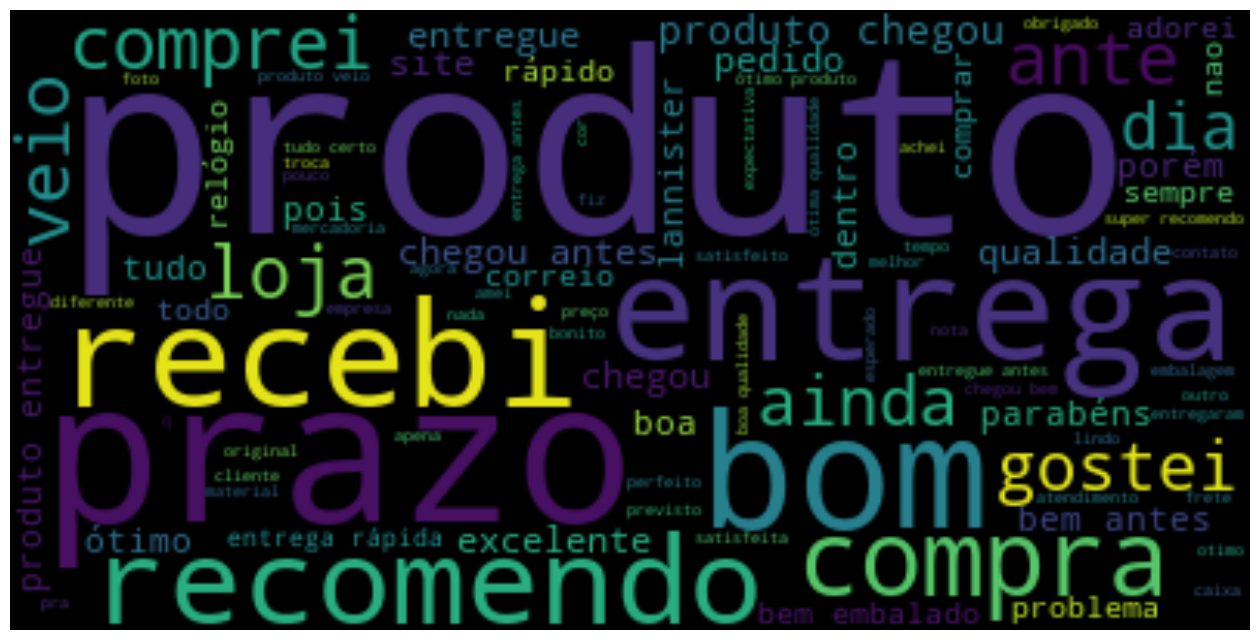

In [45]:
all_reviews = " ".join(order_reviews.dropna().review_comment_message).lower().replace(".", ""). replace(",", "")
wordcloud = WordCloud(stopwords=stopwords).generate(all_reviews)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()

In [46]:
most_frequent = nltk.FreqDist(word for word in all_reviews.split(sep=" ") if word not in stopwords)
top_20_most_frequent = []
for word, frequency in sorted(most_frequent.items(), key = lambda x:x[1], reverse=True)[:20]:
    print(word, frequency)
    top_20_most_frequent.append(word)

produto 4301
prazo 1879
antes 1461
entrega 1460
chegou 1299
recebi 1052
bom 1049
recomendo 857
entregue 852
bem 804
veio 788
qualidade 644
comprei 627
tudo 601
compra 514
loja 498
ainda 465
gostei 446
ótimo 437
excelente 432


# Statistics

In [62]:
# Most frequent words distribuition based on review score

df_frequent_words = {"word":[], "score":[], "count":[], "relative": []}
df_grouped = order_reviews.dropna().groupby(by='review_score', group_keys=True)

for score in order_reviews.review_score.unique():
    combined_reviews = ' '.join(df_grouped.get_group(score).review_comment_message.to_list())
    total_words = len(combined_reviews)
    
    for word in top_20_most_frequent:
        count = len(re.findall(word, combined_reviews))
        df_frequent_words['word'].append(word)
        df_frequent_words['score'].append(int(score))
        df_frequent_words['count'].append(int(count))
        df_frequent_words['relative'].append(float(count/total_words) * 100)

df_frequent_words = pd.DataFrame(df_frequent_words)
df_frequent_words

,word,score,count,relative
0,produto,4,497,0.552253
1,prazo,4,331,0.367798
2,antes,4,187,0.207789
3,entrega,4,184,0.204456
4,chegou,4,144,0.160009
...,...,...,...,...
95,loja,2,26,0.054626
96,ainda,2,37,0.077738
97,gostei,2,15,0.031515
98,ótimo,2,1,0.002101


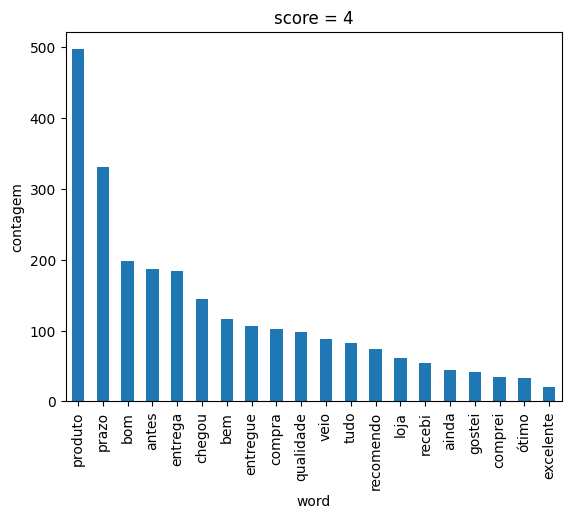

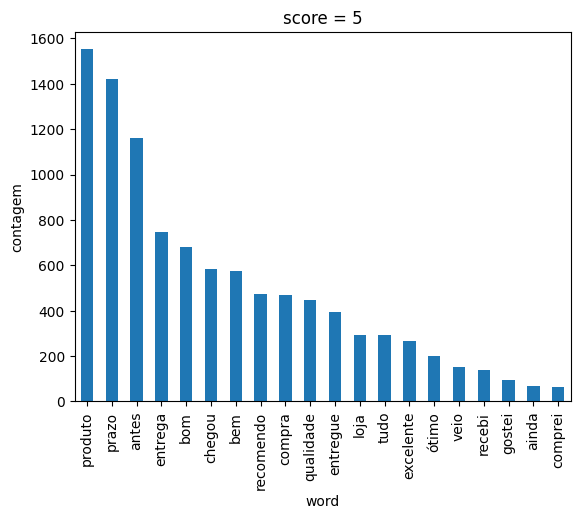

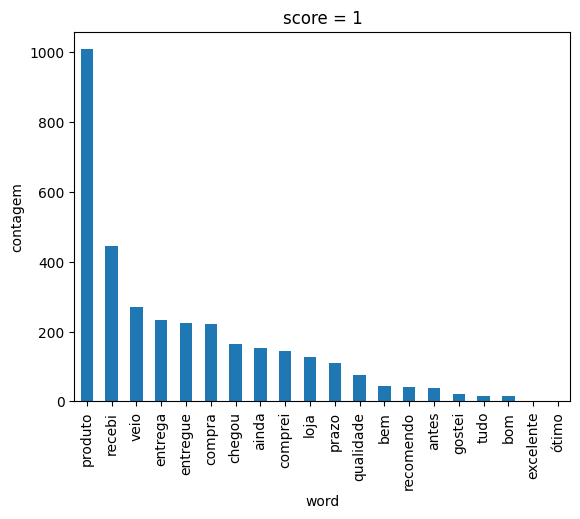

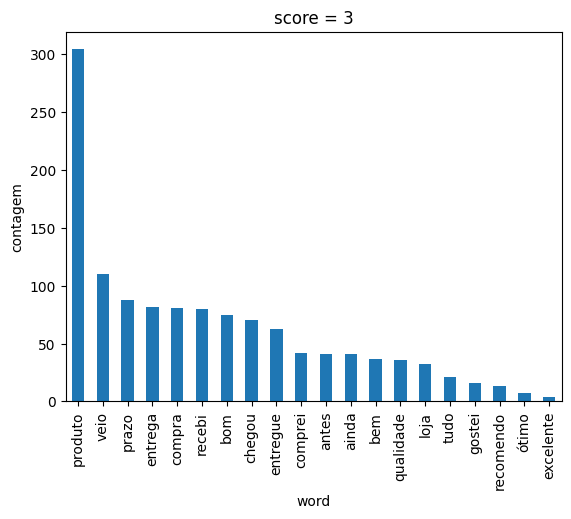

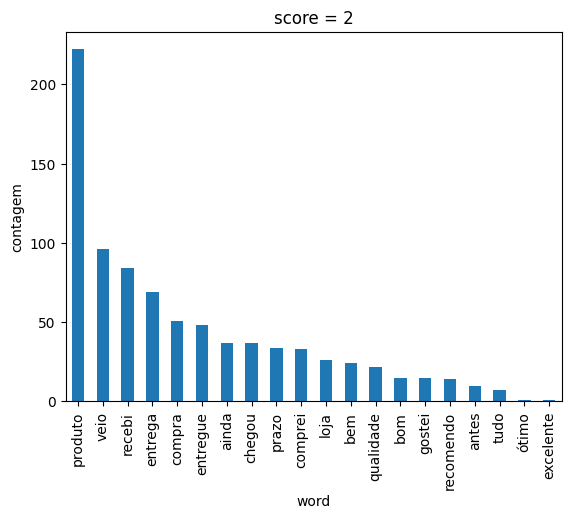

In [64]:
for score in df_frequent_words.score.unique():
    df_frequent_words.query('score == @score').sort_values(by='count', ascending=False).plot(kind='bar',
                                                                                             x='word',
                                                                                             y='count',
                                                                                             title=f'score = {score}');
    plt.legend().remove()
    plt.ylabel('contagem')


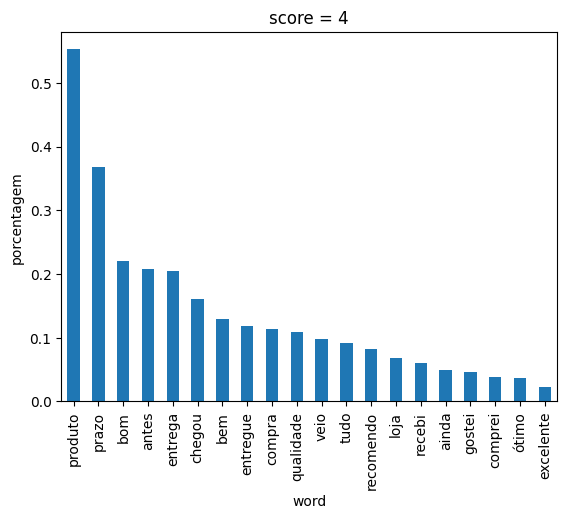

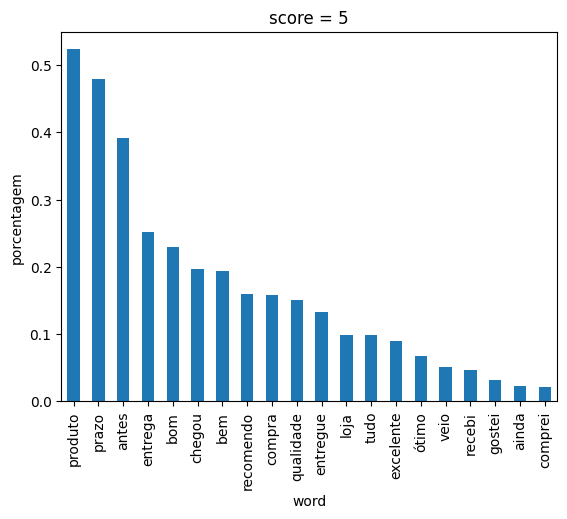

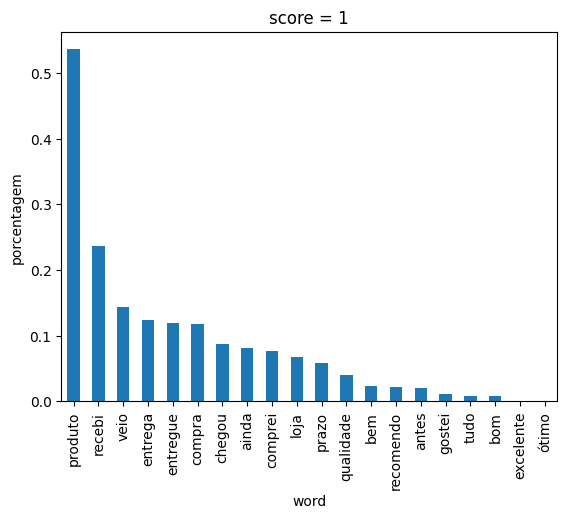

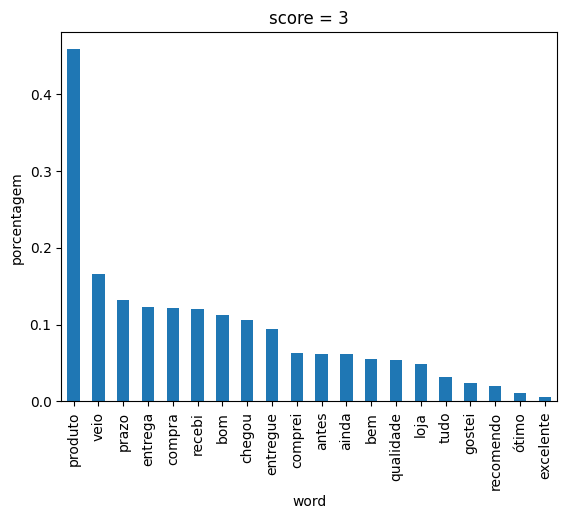

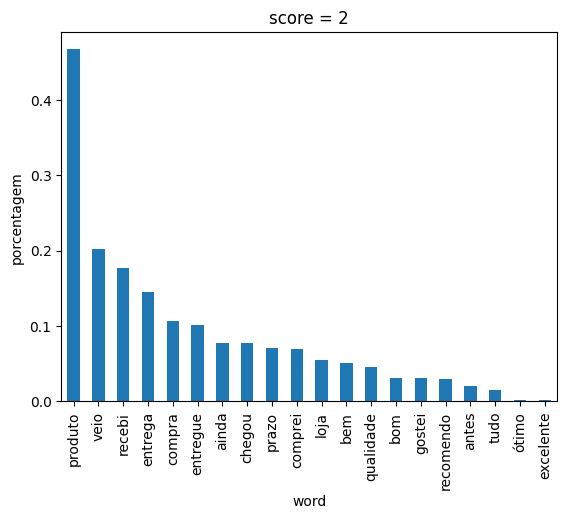

In [65]:
for score in df_frequent_words.score.unique():
    df_frequent_words.query('score == @score').sort_values(by='count', ascending=False).plot(kind='bar',
                                                                                             x='word',
                                                                                             y='relative',
                                                                                             title=f'score = {score}');
    plt.legend().remove()
    plt.ylabel('porcentagem')


# Descripitive analysis

In [50]:
customers_and_sellers_info = orders.merge(order_items, on='order_id', how='inner').merge(customers, on='customer_id', how='inner').merge(sellers, on='seller_id', how='inner')
customers_and_sellers_info = customers_and_sellers_info[['product_id','seller_state','customer_state']].copy()
customers_and_sellers_info

,product_id,seller_state,customer_state
0,87285b34884572647811a353c7ac498a,SP,SP
1,595fac2a385ac33a80bd5114aec74eb8,SP,BA
2,aa4383b373c6aca5d8797843e5594415,SP,GO
3,d0b61bfb1de832b15ba9d266ca96e5b0,MG,RN
4,65266b2da20d04dbe00c5c2d3bb7859e,SP,SP
...,...,...,...
112645,f1d4ce8c6dd66c47bbaa8c6781c2a923,SP,SP
112646,b80910977a37536adeddd63663f916ad,SP,BA
112647,d1c427060a0f73f6b889a5c7c61f2ac4,MG,RJ
112648,d1c427060a0f73f6b889a5c7c61f2ac4,MG,RJ


In [51]:
len(customers_and_sellers_info.seller_state.unique())

23

In [52]:
len(customers_and_sellers_info.customer_state.unique())

27

In [53]:
same_state_purchase = 0
for row in customers_and_sellers_info.iterrows():
    if row[1][1] == row[1][2]:
        same_state_purchase += 1
        
same_state_purchase

C:\Users\adam_\AppData\Local\Temp\ipykernel_8408\2187867823.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[1][1] == row[1][2]:


40756

In [54]:
len(customers.customer_unique_id.unique())

96096

In [55]:
orders_and_customers = orders.merge(customers, on='customer_id', how='inner')
total_repurchase = orders_and_customers.customer_unique_id.value_counts()
total_repurchase

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
d6fe1d8f8260d270ec05c8b3065c8eaa     1
8c0386035e15f02612c89d29d7694b41     1
c1c0e094a7fbde66794da6ee9f9d1dda     1
6d90b4cc432b22857f3660864f240b0c     1
60350aa974b26ff12caad89e55993bd6     1
Name: count, Length: 96096, dtype: int64

In [56]:
total_repurchase.loc[total_repurchase > 1]

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
a2c15de05ef380b5a7eaf915898926db     2
92046e40af14f7f88398c748bb559cfe     2
6ff62b85b8dd35a3402d54618bdafec6     2
6457b2cb5462c1217e8e6d36b0ff39d2     2
d77aa95864ae5b42160937615628723a     2
Name: count, Length: 2997, dtype: int64

### Proposta: Rever a forma como é calculado o prazo de entrega!
